In [1]:
# import numpy as np
# from tensorflow.keras.models import load_model
# import joblib

# model = load_model("pressure_ID_Fan_inlet_DL(1).h5")

# x = np.array(['18.51997', '60.93208', '946.2000', '226.4158', '945.4032']).astype(float)

# y = -400.0651

# scaler = joblib.load("scaler(1).pkl")

# x_scaled = scaler.transform(x.reshape(1, -1))

# pred = model.predict(x_scaled)

# print("Predicted value:", pred)


In [2]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model = load_model("pressure_at_gas_mixture_DL(3).h5")

In [3]:
df = pd.read_csv('Batch-1.1.csv')

In [4]:
df = df.iloc[:,11:24]
df.drop(columns=['Unnamed: 19','Unnamed: 20'],inplace=True)
df.head()

,Pressure at Gas Mixter inlet,Temp at BagHouse Inlet - UpperSide,Temp at BagHouse Inlet - LowerSide,Pressure at BagHouse Inlet,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
0,-119.9363,68.5,65.7,-216.1675,14.93200,17.62587,-386.0677,66.30715,946.2,228.6638,945.4032
1,-119.8785,79.4,74.0,-219.9002,15.85503,18.51997,-400.0651,60.93208,946.2,226.4158,945.4032
2,-120.2402,85.6,80.7,-215.4080,16.05035,18.84115,-397.2801,60.93605,946.2,221.4280,945.4032
3,-119.0828,85.1,82.8,-210.4601,16.11979,18.69213,-391.2399,60.93605,946.2,221.3578,945.4032
4,-117.3611,82.8,82.9,-215.1259,15.93750,18.62558,-390.9505,60.93208,946.2,222.6222,945.4032


In [5]:
print(df.isna().sum())
df.dropna(inplace=True)

Pressure at Gas Mixter inlet          0
Temp at BagHouse Inlet - UpperSide    0
Temp at BagHouse Inlet - LowerSide    0
Pressure at BagHouse Inlet            0
DP Across baghouse - UpperSide        0
DP Across baghouse - LowerSide        0
Pressure ID Fan Inlet                 0
Canopy Damper Position                0
ID Fan1 Speed                         0
ID Fan1 Current                       0
ID Fan2 Speed                         0
dtype: int64


In [6]:
x = df.drop('Pressure at Gas Mixter inlet',axis = 1)
y = df['Pressure at Gas Mixter inlet']

In [7]:
x = np.array(x)

In [8]:
x

array([[  68.5   ,   65.7   , -216.1675, ...,  946.2   ,  228.6638,
         945.4032],
       [  79.4   ,   74.    , -219.9002, ...,  946.2   ,  226.4158,
         945.4032],
       [  85.6   ,   80.7   , -215.408 , ...,  946.2   ,  221.428 ,
         945.4032],
       ...,
       [  57.7   ,   55.6   , -224.3273, ...,  946.2   ,  227.4695,
         945.4032],
       [  57.7   ,   56.6   , -222.3741, ...,  946.2   ,  227.7505,
         945.4032],
       [  58.6   ,   56.9   , -236.9792, ...,  946.2   ,  226.8372,
         945.4032]])

In [9]:
sc = joblib.load("scaler(3).pkl")
x_scaled = sc.transform(x)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [10]:
pred = model.predict(x_scaled)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [11]:
r2_score(y,pred)

0.9763993942337721

In [12]:
pred = pred.reshape(1,-1)

In [13]:
diff = pred - (np.array(y)).reshape(1,-1)
pd.DataFrame(diff)

,0,1,2,3,4,5,6,7,8,9,...,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079
0,-2.21477,-8.453302,-2.893696,-0.248339,-3.330314,1.51987,-1.19904,-3.563192,0.180102,-1.117471,...,6.489186,5.704664,1.568348,3.22167,0.062073,3.139768,-0.988626,1.039323,-0.728533,4.575697


In [17]:
print(diff[diff>12].size)
print(diff[diff>12])


4
[12.11680278 14.32272566 14.05732146 14.70753464]


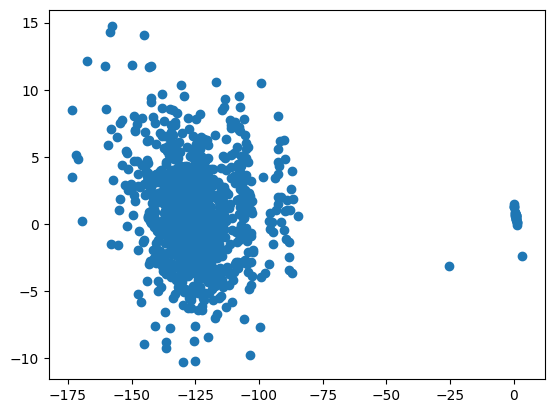

In [15]:
plt.scatter(y,diff)